In [1]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fast')
import math
import random

In [2]:
# hbar 1.055e-34 Js
# w 1000 1/cm
# 1Kcal = 4.184 KJ
Kb = 1.38e-23
h = 1.055e-34
w = 1000
hw = 50.1
hw

50.1

In [3]:
# N = number of oscilators 
# 1e
def ClassicEntropy(N,E):
    left = 3*N*Kb
    right = np.log((2*np.pi*np.e*E)/(3*N*hw))
    return left*right  

In [4]:
xofclassic = np.linspace(1,5000,5001)
Classic100 = ClassicEntropy(100,xofclassic)

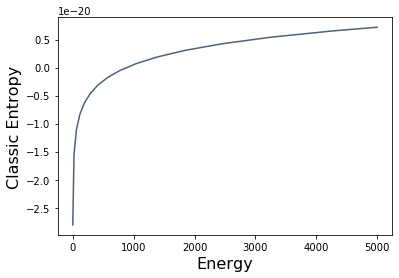

In [5]:
Tableofxclassic = Table().with_columns("Energy",xofclassic,"Classic Entropy", Classic100)
Tableofxclassic.plot(0)

In [6]:
# N = number of oscilators 
def QuantumEntropy(N,E):
    left = (E/hw)*np.log(1+(N*hw/E))
    right = N*np.log(1+E/(N*hw))
    return Kb*3*(left+right) 

In [7]:
Energy1to5k = np.linspace(1,5000,5001)
entropy3D = QuantumEntropy(100,Energy1to5k)

In [8]:
Tableboth = Table().with_columns("Energy",Energy1to5k, "Entropy of quantum",entropy3D, "Entropy Classic",Classic100)
Tableboth

Energy,Entropy of quantum,Entropy Classic
1,7.86624e-24,-2.80689e-20
1.9998,1.45858e-23,-2.51997e-20
2.9996,2.08733e-23,-2.35212e-20
3.9994,2.68802e-23,-2.23303e-20
4.9992,3.26785e-23,-2.14065e-20
5.999,3.83107e-23,-2.06517e-20
6.9988,4.38046e-23,-2.00135e-20
7.9986,4.91804e-23,-1.94607e-20
8.9984,5.44527e-23,-1.89731e-20
9.9982,5.96332e-23,-1.85369e-20


In [9]:
bottompoint = Tableboth.sort("Energy",descending=True)
bottompoint

Energy,Entropy of quantum,Entropy Classic
5000,5.73353e-21,7.19228e-21
4999,5.73295e-21,7.19146e-21
4998,5.73238e-21,7.19063e-21
4997,5.73181e-21,7.1898e-21
4996,5.73123e-21,7.18897e-21
4995,5.73066e-21,7.18814e-21
4994,5.73008e-21,7.18731e-21
4993,5.72951e-21,7.18649e-21
4992,5.72894e-21,7.18566e-21
4991,5.72836e-21,7.18483e-21


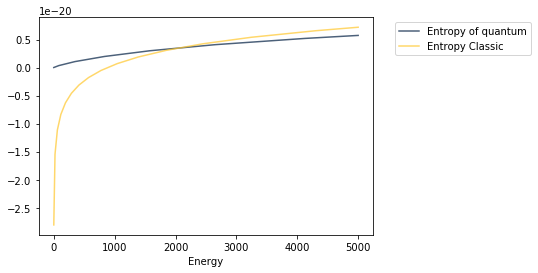

In [10]:
#1f
Tableboth.plot("Energy")

In [11]:
newquantum = entropy3D-5.73353e-21
newclassic = Classic100-7.19228e-21

In [12]:
Energy1to47 = np.linspace(1,5000,5001)
newtabl = Table().with_columns("Energy",Energy1to47, "newquantum", newquantum, "classic",newclassic)
newtabl

Energy,newquantum,classic
1,-5.72566e-21,-3.52612e-20
1.9998,-5.71894e-21,-3.2392e-20
2.9996,-5.71266e-21,-3.07135e-20
3.9994,-5.70665e-21,-2.95225e-20
4.9992,-5.70085e-21,-2.85988e-20
5.999,-5.69522e-21,-2.7844e-20
6.9988,-5.68973e-21,-2.72058e-20
7.9986,-5.68435e-21,-2.6653e-20
8.9984,-5.67908e-21,-2.61654e-20
9.9982,-5.6739e-21,-2.57292e-20


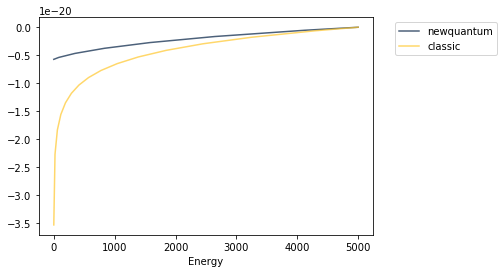

In [13]:
#1f
newtabl.plot(0)

In [14]:
inverses2 = ClassicEntropy(100,Energy1to47)
res = inverses2[::-1]

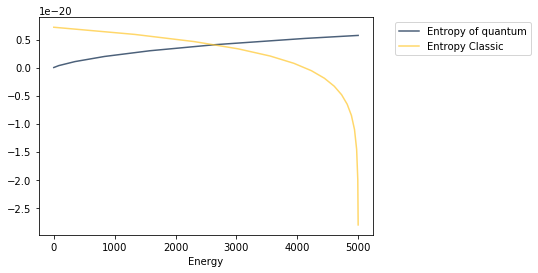

In [15]:
#1g
inverseenergy = Table().with_columns("Energy",Energy1to5k, "Entropy of quantum",entropy3D, "Entropy Classic",res)
inverseenergy.plot(0)

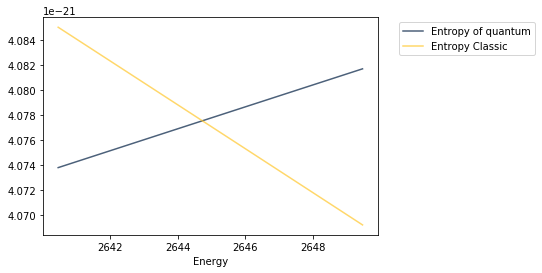

In [16]:
zoom = inverseenergy.where("Energy", are.between(2640,2650))
zoom.plot(0)

In [17]:
#these system cross at 2645 Kcal

In [18]:
#3
circle = []
iterations = np.linspace(100,1000000,10000)
countcircle = 0
for j in iterations:
    xm = random.uniform(-1,1)
    ym = random.uniform(-1,1)
    if np.sqrt((xm**2)+(ym**2)) <= 1:
        countcircle += 1
    pi = 4*countcircle
    circle.append(pi)

In [19]:
guess = circle/iterations
guess

array([0.        , 0.02      , 0.02666667, ..., 0.03129026, 0.03129113,
       0.031292  ])

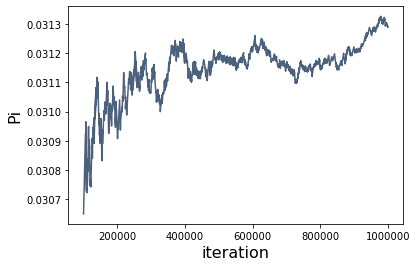

In [20]:
solving_pi = Table().with_columns("iteration",iterations,"Pi",guess).where("iteration",are.above(100000))
solving_pi.plot(0)

In [21]:
Radius1 = make_array(0,0,6)
Radius2 = make_array(0,0,0)

In [22]:
#5b
def Force(r2,r1):
    output_coordinates = np.zeros([1, 3])
    difference = (r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 + (r1[2]-r2[2])**2
    radius = math.sqrt(difference)
    potential = (-4.1*1.77)*(((12*(4.1**12))*((1/radius)**13)) - ((6*(4.1**6))*((1/radius)**7)))
    for i in range(3):
        force12 = potential*((r1[i]-r2[i])/difference)
        output_coordinates[0][i] = force12
    return output_coordinates

In [23]:
testing = Force(Radius1,Radius2)
testing

array([[ 0.        ,  0.        , -0.09806647]])

In [24]:
# 2x2x2
counter = 0
v = np.zeros([8,3])

for i in range(2):
    for j in range(2):
        for k in range(2):
            v[counter] = make_array(i,j,k)
            counter += 1

In [25]:
my_array = 4.6*v
my_array

array([[0. , 0. , 0. ],
       [0. , 0. , 4.6],
       [0. , 4.6, 0. ],
       [0. , 4.6, 4.6],
       [4.6, 0. , 0. ],
       [4.6, 0. , 4.6],
       [4.6, 4.6, 0. ],
       [4.6, 4.6, 4.6]])

In [26]:
array_for_each_point = []
for i in range(len(my_array)):
    array_for_each_point.append([])

In [27]:
for i in range(len(my_array)):
    for j in range(len(my_array)):
        if i != j:
            yfor2 = Force(my_array[i], my_array[j])
            array_for_each_point[i].append(yfor2)

In [28]:
#5c
force_pair = []
for i in range(len(my_array)):
    force_pair.append(np.zeros([1,3]))
    for j in range(len(array_for_each_point[i])):
        force_pair[i] = np.add(force_pair[i], array_for_each_point[i][j])
force_pair

[array([[0.08401841, 0.08401841, 0.08401841]]),
 array([[ 0.08401841,  0.08401841, -0.08401841]]),
 array([[ 0.08401841, -0.08401841,  0.08401841]]),
 array([[ 0.08401841, -0.08401841, -0.08401841]]),
 array([[-0.08401841,  0.08401841,  0.08401841]]),
 array([[-0.08401841,  0.08401841, -0.08401841]]),
 array([[-0.08401841, -0.08401841,  0.08401841]]),
 array([[-0.08401841, -0.08401841, -0.08401841]])]

In [29]:
#3x3x3
counter = 0
b = np.zeros([27,3])

for i in range(3):
    for j in range(3):
        for k in range(3):
            b[counter] = make_array(i,j,k)
            counter += 1

In [30]:
x3x3 = b*4.6
x3x3

array([[0. , 0. , 0. ],
       [0. , 0. , 4.6],
       [0. , 0. , 9.2],
       [0. , 4.6, 0. ],
       [0. , 4.6, 4.6],
       [0. , 4.6, 9.2],
       [0. , 9.2, 0. ],
       [0. , 9.2, 4.6],
       [0. , 9.2, 9.2],
       [4.6, 0. , 0. ],
       [4.6, 0. , 4.6],
       [4.6, 0. , 9.2],
       [4.6, 4.6, 0. ],
       [4.6, 4.6, 4.6],
       [4.6, 4.6, 9.2],
       [4.6, 9.2, 0. ],
       [4.6, 9.2, 4.6],
       [4.6, 9.2, 9.2],
       [9.2, 0. , 0. ],
       [9.2, 0. , 4.6],
       [9.2, 0. , 9.2],
       [9.2, 4.6, 0. ],
       [9.2, 4.6, 4.6],
       [9.2, 4.6, 9.2],
       [9.2, 9.2, 0. ],
       [9.2, 9.2, 4.6],
       [9.2, 9.2, 9.2]])

In [31]:
def Ulj(r2,r1):
    difference = (r1[0]-r2[0])**2 + (r1[1]-r2[1])**2 + (r1[2]-r2[2])**2
    radius = math.sqrt(difference)
    potential = (4*1.77)*((4.10/radius)**12 - (4.10/radius)**6)
    return potential

In [32]:
#5d
def steepest_descent(step_size):
    cube_points = x3x3
    for j in range(1, len(cube_points)):
        normal_force = cube_points[j]
        length = np.sqrt((normal_force[0])**2 + (normal_force[1])**2 + (normal_force[2])**2)
        step_pair = normal_force / length
        displacement = step_pair * step_size
        cube_points[j] += displacement
    return cube_points

In [33]:
onestep = steepest_descent(0.1)
onestep

array([[0.        , 0.        , 0.        ],
       [0.        , 0.        , 4.7       ],
       [0.        , 0.        , 9.3       ],
       [0.        , 4.7       , 0.        ],
       [0.        , 4.67071068, 4.67071068],
       [0.        , 4.64472136, 9.28944272],
       [0.        , 9.3       , 0.        ],
       [0.        , 9.28944272, 4.64472136],
       [0.        , 9.27071068, 9.27071068],
       [4.7       , 0.        , 0.        ],
       [4.67071068, 0.        , 4.67071068],
       [4.64472136, 0.        , 9.28944272],
       [4.67071068, 4.67071068, 0.        ],
       [4.65773503, 4.65773503, 4.65773503],
       [4.64082483, 4.64082483, 9.28164966],
       [4.64472136, 9.28944272, 0.        ],
       [4.64082483, 9.28164966, 4.64082483],
       [4.63333333, 9.26666667, 9.26666667],
       [9.3       , 0.        , 0.        ],
       [9.28944272, 0.        , 4.64472136],
       [9.27071068, 0.        , 9.27071068],
       [9.28944272, 4.64472136, 0.        ],
       [9.

In [34]:
def energystep(point):
    testenergy = []
    for i in range(len(onestep)):
        for j in range(len(onestep)):
            if i != j:
                Efor3 = Ulj(onestep[i],onestep[j])
                testenergy.append(Efor3)
    return np.sum(testenergy)

In [35]:
ghy = energystep(onestep)
ghy

-264.2966381274415

In [36]:
Points_3000 = []
for i in range(3000):
    Points_3000 = steepest_descent(0.1)

In [44]:
Points_3000

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        , 304.7       ],
       [  0.        ,   0.        , 309.3       ],
       [  0.        , 304.7       ,   0.        ],
       [  0.        , 216.80274503, 216.80274503],
       [  0.        , 138.80880001, 277.61760002],
       [  0.        , 309.3       ,   0.        ],
       [  0.        , 277.61760002, 138.80880001],
       [  0.        , 221.40274503, 221.40274503],
       [304.7       ,   0.        ,   0.        ],
       [216.80274503,   0.        , 216.80274503],
       [138.80880001,   0.        , 277.61760002],
       [216.80274503, 216.80274503,   0.        ],
       [177.86281578, 177.86281578, 177.86281578],
       [127.11531197, 127.11531197, 254.23062394],
       [138.80880001, 277.61760002,   0.        ],
       [127.11531197, 254.23062394, 127.11531197],
       [104.63333333, 209.26666667, 209.26666667],
       [309.3       ,   0.        ,   0.        ],
       [277.61760002,   0.     

In [52]:
def the_steepest_descent(step_size, cube):
    new_cube = cube
    for j in range(1, len(cube)):
        normal_force = cube[j]
        length = np.sqrt((normal_force[0])**2 + (normal_force[1])**2 + (normal_force[2])**2)
        step_pair = normal_force / length
        displacement = step_pair * step_size
        new_cube[j] += displacement
    return new_cube

In [53]:
def the_energystep(cube):
    testenergy = []
    for i in range(len(cube)):
        for j in range(len(cube)):
            if i != j:
                Efor3 = Ulj(cube[i],cube[j])
                testenergy.append(Efor3)
    return np.sum(testenergy)

In [54]:
def loop(step_size):
    energy_array = np.zeros(3000)
    the_cube = x3x3
    for i in range(3000):
        the_cube = the_steepest_descent(0.1, the_cube)
        energy_array[i] = the_energystep(the_cube)
    return energy_array

In [55]:
loop001 = loop(0.001)

In [56]:
loop01 = loop(0.01)

In [57]:
loop1 = loop(0.1)

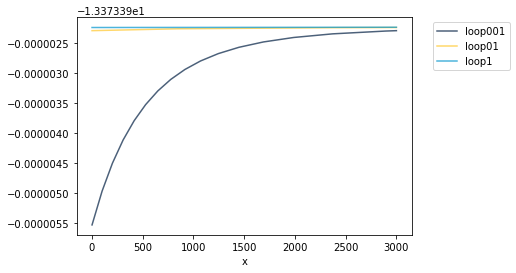

In [58]:
#5f
xstepp = np.linspace(0,3000,3000)
plottingsteep = Table().with_columns("x",xstepp,"loop001",loop001,"loop01",loop01,"loop1",loop1)
plottingsteep.plot(0)